In [3]:
!pip install decision-tree-id3
import matplotlib.pyplot as plt
import pandas as pd

import six
import sys
sys.modules['sklearn.externals.six']=six

from id3 import Id3Estimator

In [5]:
tennis_data=pd.read_csv('PlayTennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [8]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

tennis_data['Outlook']=Le.fit_transform(tennis_data['Outlook'])
tennis_data['Temperature']=Le.fit_transform(tennis_data['Temperature'])
tennis_data['Humidity']=Le.fit_transform(tennis_data['Humidity'])
tennis_data['Wind']=Le.fit_transform(tennis_data['Wind'])
tennis_data['Play Tennis']=Le.fit_transform(tennis_data['Play Tennis'])
tennis_data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [13]:
y=tennis_data['Play Tennis']
x=tennis_data.drop(['Play Tennis'],axis=1)


In [14]:
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [15]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: Play Tennis, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.9,random_state=0)

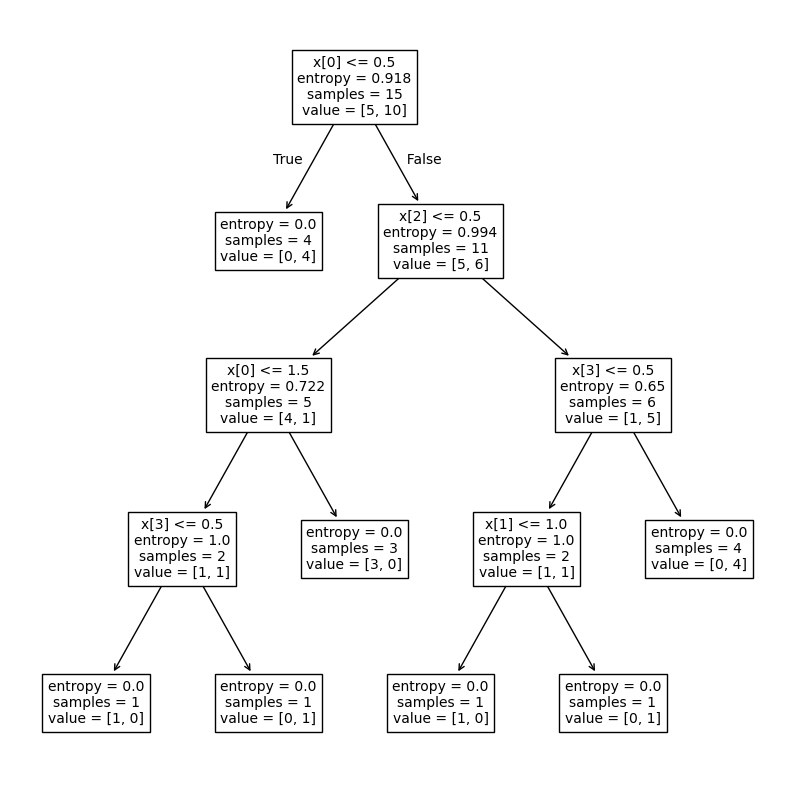

In [18]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(x_train,y_train)
clf.fit(x,y)
fig,ax=plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [19]:
x_pred=clf.predict(x_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
estimator.fit(x_train, y_train)
x_pred = estimator.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, x_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,x_pred))

0.6428571428571429
